In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./DATA/data_science_job.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [9]:
df.shape

(19158, 13)

In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [11]:
df.isnull().mean()*100
# Percentage of data missing

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [12]:
# only remove data where the missing data is less than 5%

cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
6361,NaN,no_enrollment,Graduate,4.0,30.0
4482,0.624,Full time course,Graduate,6.0,13.0
7832,0.855,Full time course,Graduate,3.0,2.0
15905,0.920,no_enrollment,Masters,20.0,38.0
14159,0.910,no_enrollment,Graduate,20.0,50.0


In [14]:
new_df = df[cols].dropna()

df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

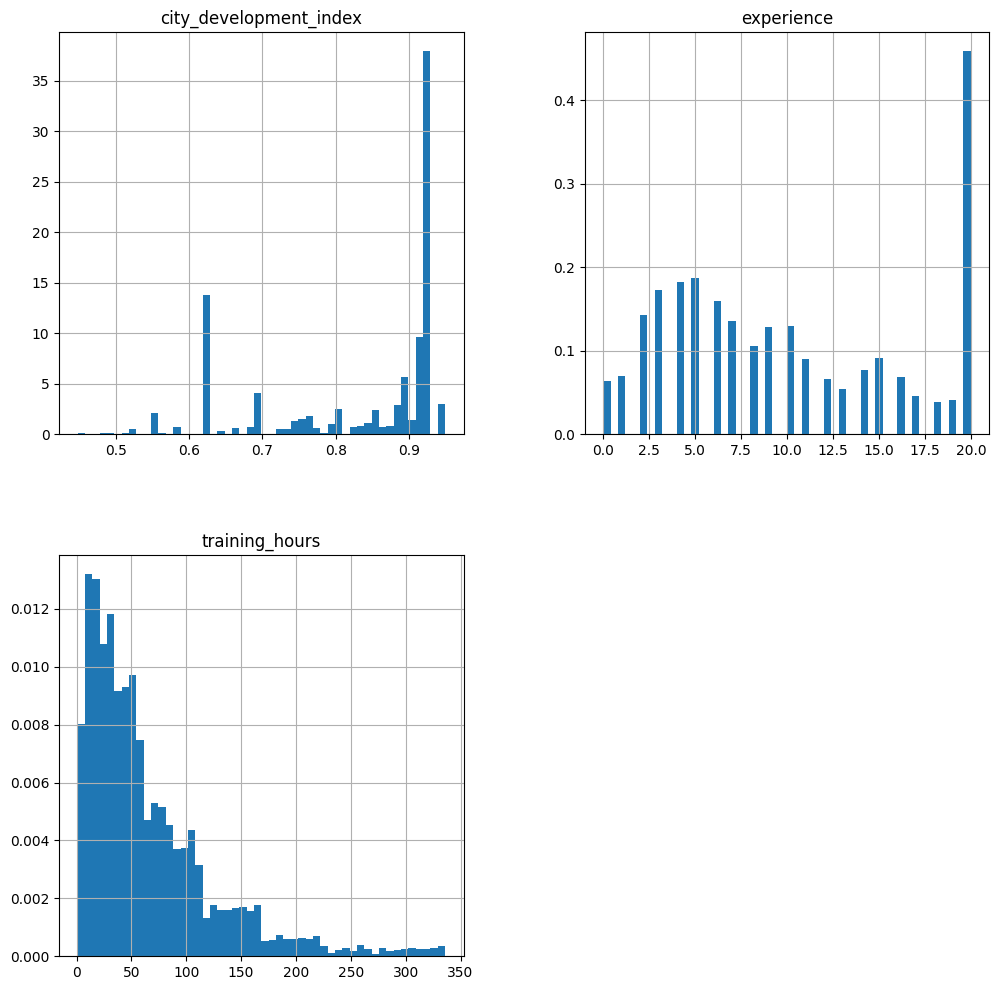

In [15]:
new_df.hist(
    bins=50, density=True, figsize=(12, 12)
)

## Mean/Median Imputation to fill missing Numerical Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
df1 = pd.read_csv("./DATA/titanic.csv")

In [20]:
df1 = df1[["Age", "Fare", "Survived"]]

df1.head(5)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [21]:
df1.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df1[["Age", "Fare"]], df1["Survived"], test_size=0.1 )

In [24]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

mean_fare = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [25]:
X_train["age_median"] = X_train["Age"].fillna(median_age)
X_train["age_mean"] = X_train["Age"].fillna(mean_age)

X_train["Fare_median"] = X_train["Fare"].fillna(median_age)
X_train["Fare_mean"] = X_train["Fare"].fillna(mean_age)

In [26]:
X_train.sample(10)

,Age,Fare,age_median,age_mean,Fare_median,Fare_mean
845,42.0,7.5500,42.0,42.000000,7.5500,7.5500
74,32.0,56.4958,32.0,32.000000,56.4958,56.4958
857,51.0,26.5500,51.0,51.000000,26.5500,26.5500
740,NaN,30.0000,28.0,29.701889,30.0000,30.0000
359,NaN,7.8792,28.0,29.701889,7.8792,7.8792
133,29.0,26.0000,29.0,29.000000,26.0000,26.0000
505,18.0,108.9000,18.0,18.000000,108.9000,108.9000
5,NaN,8.4583,28.0,29.701889,8.4583,8.4583
680,NaN,8.1375,28.0,29.701889,8.1375,8.1375
614,35.0,8.0500,35.0,35.000000,8.0500,8.0500


Also check the variance before and after the mean median value replacement

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df1[["Age", "Fare"]],
    df1["Survived"],
    test_size=0.15
)

In [28]:
X_train.isnull().sum()

Age     156
Fare      0
dtype: int64

In [29]:
imputer1 = SimpleImputer(strategy="median")
imputer2 = SimpleImputer(strategy="mean")

In [30]:
trf = ColumnTransformer([
    ("imputer1", imputer1, ["Age"]),
    ("imputer2", imputer2, ["Fare"])
], remainder="passthrough")

In [31]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [32]:
trf.named_transformers_["imputer1"].statistics_

array([28.])

## Automatically select imputer parameters

In [33]:
df = pd.read_csv("./DATA/titanic.csv")

In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [38]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [39]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,0,2,male,28.0,0,0,13.000,S
216,1,3,female,27.0,0,0,7.925,S
32,1,3,female,NaN,0,0,7.750,Q
402,0,3,female,21.0,1,0,9.825,S
665,0,2,male,32.0,2,0,73.500,S


In [40]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [42]:
numerical_features = ["Age", "Fare"]
numerical_transformation = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

In [45]:
categorical_features = ["Embarked", "Sex"]
categorical_transformation = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformation, numerical_features),
        ("cat", categorical_transformation, categorical_features)
    ]
)

In [47]:
classifier = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [50]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__imputer__strategy": ["most_frequent", "constant"],
    "classifier__C": [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=10)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Embarked',
                                                                          'Sex'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10, 100],
                         'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                  'constant'],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']})

In [52]:
print(f"Internal CV Score: ", {grid_search.best_score_})

Internal CV Score:  {0.7877469135802471}


In [53]:
grid_search.cv_results_

{'mean_fit_time': array([0.0126703 , 0.01086211, 0.01179786, 0.01165302, 0.01073656,
        0.01018496, 0.01114354, 0.01272876, 0.01003082, 0.0115726 ,
        0.00993221, 0.00907235, 0.00890992, 0.00909383, 0.0104502 ,
        0.01098127]),
 'std_fit_time': array([0.0058358 , 0.00096184, 0.00171187, 0.00140703, 0.00123262,
        0.0011053 , 0.00187503, 0.00170964, 0.00191247, 0.00153802,
        0.0016635 , 0.00092157, 0.00055344, 0.00030376, 0.00046433,
        0.00092536]),
 'mean_score_time': array([0.00408788, 0.00412662, 0.00441468, 0.00408037, 0.0038991 ,
        0.00459905, 0.00486729, 0.0048197 , 0.00397501, 0.00400033,
        0.00397027, 0.00351138, 0.00372262, 0.00404835, 0.00370331,
        0.00393617]),
 'std_score_time': array([0.00083373, 0.00053883, 0.00045302, 0.00086982, 0.00094995,
        0.00120822, 0.00097672, 0.0009198 , 0.00107793, 0.00064792,
        0.00101236, 0.00070263, 0.00049758, 0.00048113, 0.00045828,
        0.00031492]),
 'param_classifier__C': ma

In [54]:
grid_search.best_params_

{'classifier__C': 1.0,
 'preprocessor__cat__imputer__strategy': 'most_frequent',
 'preprocessor__num__imputer__strategy': 'mean'}

## KNN Imputer

In [59]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=2)

X_train_knn = knn.fit_transform(X_train[["Age", "Fare"]])